In [1]:
import json
import seaborn as sns
from os.path import exists
import pandas as pd

In [2]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,12

In [3]:
MODELS = [
    "text-davinci-002",
    "text-curie-001",
    "text-babbage-001",
    "bigscience/bloom",
    "EleutherAI/gpt-j-6B",
    "gpt-neox-20b",
    "facebook/opt-13b",
    "facebook/opt-30b",
    "co:here",
    "jurassic1-jumbo",
    "ul2",
    "google/flan-t5-xxl"
]

prompts = [
    "1",
    "2",
    "3",
    "4",
    "5",
    "bloom1",
    "bloom2",
    "bloom3",
    "bloom4",
    "bloom5"
]

n_shots = [1,3,5,10]

In [4]:
from sklearn.metrics import precision_recall_fscore_support


In [5]:
log_data = []
for model in MODELS:
    for prompt in prompts:
        for n_shot in n_shots:
            prompt_name = prompt
            model_name = model.replace('/', '-')
            log_file = f"../llm_logs/similarity-{model_name}-{prompt_name}-{n_shot}.json"
            if exists(log_file):
                with open(log_file) as f:
                    data = json.load(f)
                
                labels = []
                preds = []
                for i in range(len(data['data'])):
                    labels.append(data['data'][i]['label'])
                    preds.append(data['data'][i]['pred'])

                #precision_recall_fscore_support(labels, preds, average="macro")
                p, r, f1, _ = precision_recall_fscore_support(labels, preds, average="macro")
                log_data.append({
                    "model": model,
                    "prompt": prompt_name,
                    "n_shot": n_shot,
                    "precision": p,
                    "recall": r,
                    "f1": f1
                })


/home/daniel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/daniel/.local/lib/python3.8/site-p

In [6]:
model_map = [
    ("text-davinci-002","GPT3-davinci"),
    ("text-curie-001","GPT3-curie"),
    ("text-babbage-001","GPT3-babbage"),
    ("bigscience/bloom","BLOOM"),
    ("EleutherAI/gpt-j-6B","GPT-J-6B"),
    ("gpt-neox-20b","GPT-NeoX-20B"),
    ("facebook/opt-13b","OPT-13B"),
    ("facebook/opt-30b","OPT-30B"),
    ("co:here","Co:here"),
    ("jurassic1-jumbo","Jurassic-1 Jumbo"),
    ("ul2","UL2"),
    ("google/flan-t5-xxl","Flan-T5-xxl")
]
for m in model_map:
    for l in log_data:
        if l['model'] == m[0]:
            l['model'] = m[1]

In [7]:
df = pd.DataFrame(log_data)

In [8]:
#df.loc[df['n_shot']==3]rse-grained types, 66 fine-grained types, 188,200 sentences, 491,711 entities, and 4,601,223 tokens. Three benchmark tasks are built, one is supervised (Few-NERD (SU

In [9]:
#sns.barplot(data=df.loc[df['model'].isin(["text-davinci-002", "bigscience/bloom", "co:here", "jurassic1-jumbo"])], x="model", y="f1", hue="prompt")

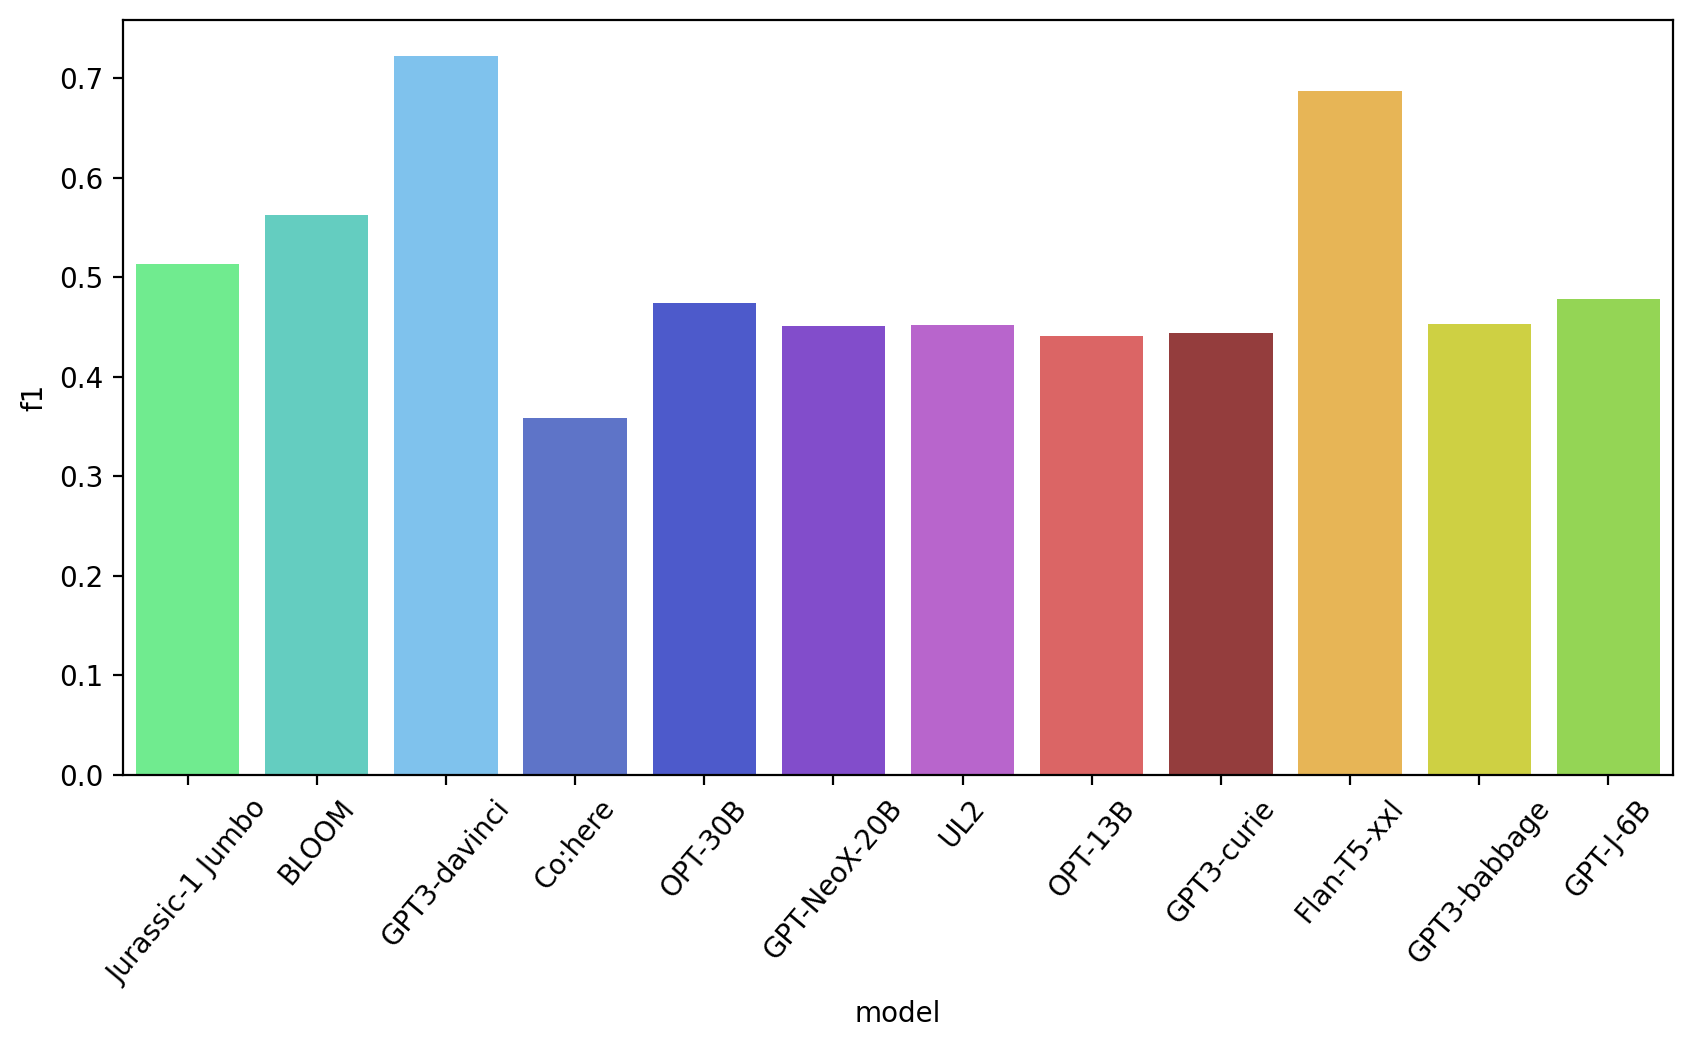

In [10]:

rcParams['figure.figsize'] = 10,5
rcParams['figure.dpi'] = 200

pallete = ["#5cff85", "#52dfcd", "#6dc6ff", "#4c6ada", "#3849e0", "#7f38e0",
           "#c254dd", "#ef5151", "#a22f2f", "#ffbd3e", "#e5e72c", "#94ea40"]

customPalette = sns.set_palette(sns.color_palette(pallete))


order = ["Jurassic-1 Jumbo", "BLOOM", "GPT3-davinci", "Co:here", "OPT-30B", 
         "GPT-NeoX-20B", "UL2", "OPT-13B", "GPT3-curie", "Flan-T5-xxl", "GPT3-babbage", "GPT-J-6B"]

df2 = df.loc[df['prompt'].isin(["1","2","3","4","5"])]
#idx = df2.groupby(['model'])['f1'].transform(max) == df2['f1']
ax = sns.barplot(data=df2, x="model", y="f1", palette=customPalette, errorbar=None, order=order)
ax.tick_params(axis='x', rotation=50)

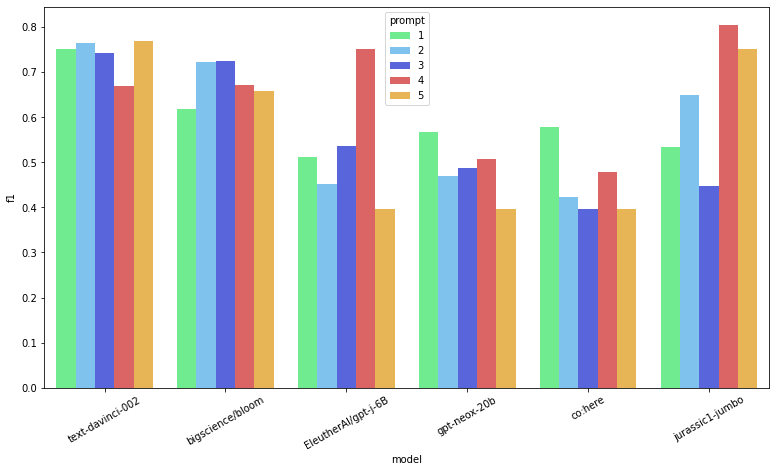

In [35]:
#rcParams['figure.figsize'] = 13,7

rcParams['figure.figsize'] = 10,5
rcParams['figure.dpi'] = 200

pallete = ["#5cff85", "#6dc6ff", "#4455f0", "#ef5151", "#ffbd3e"]
customPalette = sns.set_palette(sns.color_palette(pallete))
df2 = df.loc[df['model'].isin(["text-davinci-002", "bigscience/bloom", "EleutherAI/gpt-j-6B", "gpt-neox-20b", "co:here", "jurassic1-jumbo"])]
df2 = df2.loc[df2['prompt'].isin(["1","2","3","4","5"])]
idx = df2.groupby(['model', 'prompt'])['f1'].transform(max) == df2['f1']
ax = sns.barplot(data=df2[idx], x="model", y="f1", hue="prompt", palette=customPalette)
ax.tick_params(axis='x', rotation=30)